In [1]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt

In [2]:
# Calculate the entropy of a given dataset X
def entropy_try(X):
    number_of_values = list(set(X))
    n = len(X)
    p_s = 0
    for x in number_of_values:
        n_x = len(np.where(X==x)[0])
        p_x = n_x/n
        p_s = p_s + p_x*log(p_x)
    return -p_s

In [3]:
# Entropy of a binomial distribution
def entropy(p):
    return -(p*log(p)+(1-p)*log(1-p))

p_0 = 0.5
X = np.random.choice([0, 1], p = [p_0, 1-p_0], size = 10000)
print('The number of 0 is %i, out of %i'%(len(np.where(X==0)[0]), len(X)))
print('The number of 1 is %i, out of %i'%(len(np.where(X==1)[0]), len(X)))
print('The theoretical entropy for p = %.1f is %.2f'%(p_0, entropy(p_0)))

The number of 0 is 5065, out of 10000
The number of 1 is 4935, out of 10000
The theoretical entropy for p = 0.5 is 0.69


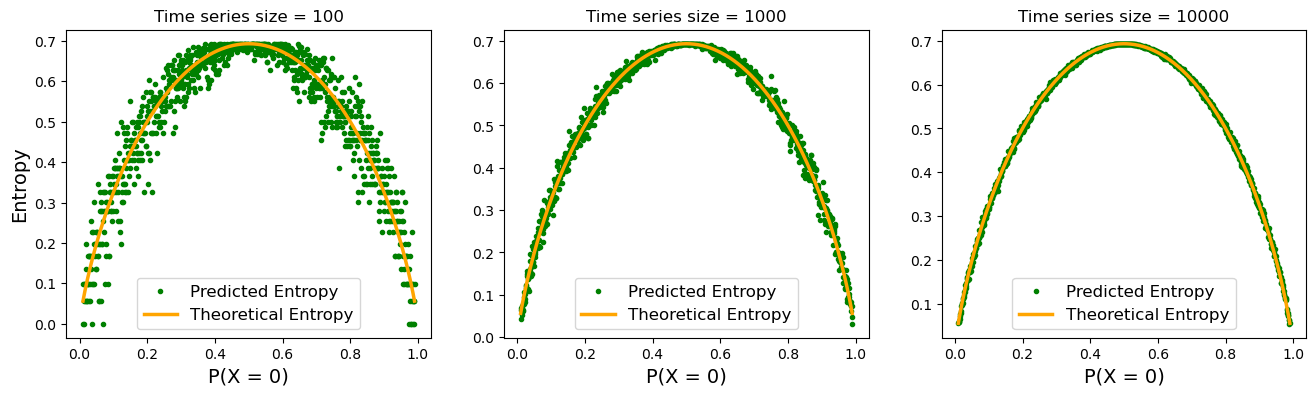

In [4]:
# Under the binomial setting, compare theoretical entropy and predicted entropy in different sizes
sizes = [100, 1000, 10000]
plt.figure(figsize = (16, 4))
for i in range(len(sizes)):
    plt.subplot(1, len(sizes), i+1)
    plt.title('Time series size = %i'%(sizes[i]))
    real_entropies = []
    pred_entropies = []
    Ps= np.linspace(0.01, 0.99, 1000)
    for p_0 in Ps:
        X = np.random.choice([0, 1], p = [p_0, 1-p_0], size = sizes[i])
        real_entropies.append(entropy(p_0))
        pred_entropies.append(entropy_try(X))
    plt.plot(Ps, pred_entropies,'.', label = 'Predicted Entropy', color = 'green')
    plt.plot(Ps, real_entropies, lw = 2.5, color = 'orange', label = 'Theoretical Entropy')
    plt.xlabel('P(X = 0)', fontsize = 14)
    if i==0:
        plt.ylabel('Entropy', fontsize = 14)
    plt.legend(fontsize = 12)

In [5]:
p_vector = np.random.choice(100, size = 3)
p_vector = p_vector/sum(p_vector)
print('The generated probability vector for a 3 case time series is p=', p_vector)

The generated probability vector for a 3 case time series is p= [0.06410256 0.55128205 0.38461538]


In [6]:
def entropy(p_vector):
    p_0 = p_vector[0] * log(p_vector[0])
    for p in p_vector[1:]:
        p_0 = p_0 + p * log(p)
    return -p_0

In [7]:
p_vector = np.random.choice(100, size = 5)
p_vector = p_vector/sum(p_vector)
X = np.random.choice([0, 1, 2, 3, 4], p = p_vector, size = 10000)
print('The theoretical entropy for p_0 = %.2f, p_1 = %.2f, p_2 = %.2f, p_3 = %.2f, p_4 = %.2f, is %.2f'%(p_vector[0], p_vector[1], p_vector[2], p_vector[3], p_vector[4], entropy(p_vector)))
print('The predicted entropy for p_0 = %.2f, p_1 = %.2f, p_2 = %.2f, p_3 = %.2f, p_4 = %.2f, is %.2f'%(p_vector[0], p_vector[1], p_vector[2], p_vector[3], p_vector[4], entropy_try(X)))

The theoretical entropy for p_0 = 0.45, p_1 = 0.04, p_2 = 0.04, p_3 = 0.07, p_4 = 0.39, is 1.19
The predicted entropy for p_0 = 0.45, p_1 = 0.04, p_2 = 0.04, p_3 = 0.07, p_4 = 0.39, is 1.18


Text(0, 0.5, 'Predicted Entropy')

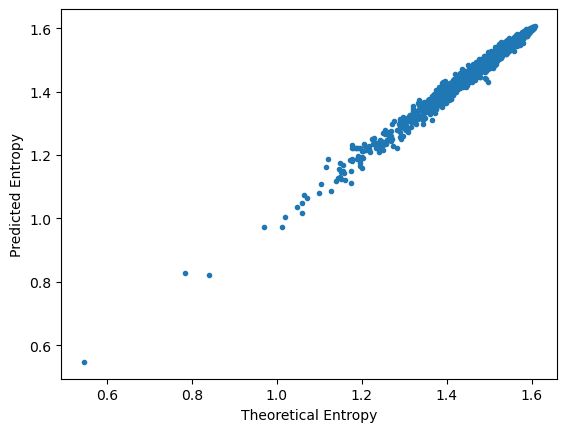

In [8]:
# The corelation between the theoretical and predicted entropy 
real_entropies = []
pred_entropies = []
for i in range(1000):
    p_vector = np.random.choice(100, size = 5)
    p_vector = p_vector + 1
    p_vector = p_vector/sum(p_vector)
    X = np.random.choice([0, 1, 2, 3, 4], p = p_vector, size = 1000)
    real_entropies.append(entropy(p_vector))
    pred_entropies.append(entropy_try(X))
plt.plot(real_entropies, pred_entropies,'.')
plt.xlabel('Theoretical Entropy')
plt.ylabel('Predicted Entropy')